In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [2]:
heart = pd.read_csv('~heart.csv')

# 1. Exploratory Data Analysis

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age: The person's age in years\
sex: The person's sex (1 = male, 0 = female)\
cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)\
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)\
chol: The person's cholesterol measurement in mg/dl\
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)\
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)\
thalach: The person's maximum heart rate achieved\
exang: Exercise induced angina (1 = yes; 0 = no)\
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)\
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)\
ca: The number of major vessels (0-3)\
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)\
target: Heart disease (0 = no, 1 = yes)\

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart.duplicated().sum()

1

In [8]:
heart.drop_duplicates(inplace=True)
heart.duplicated().sum()

0

Text(0, 0.5, 'Frequency')

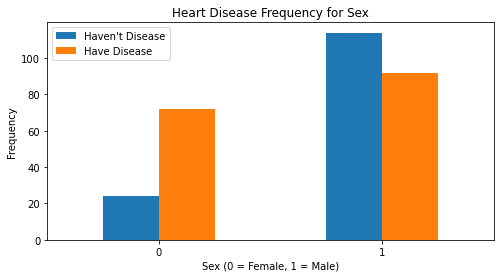

In [9]:
pd.crosstab(heart.sex,heart.target).plot(kind='bar',figsize=(8,4))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')

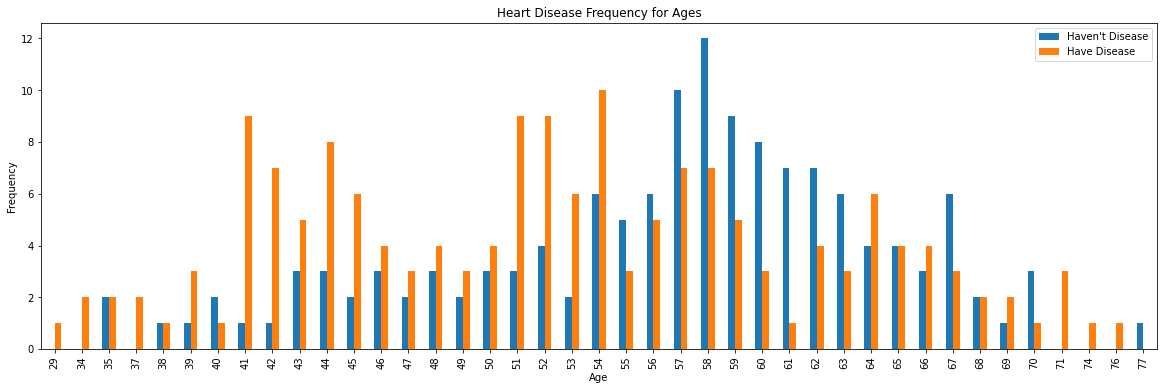

In [10]:
pd.crosstab(heart.age, heart.target).plot(kind='bar', figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])

<AxesSubplot:>

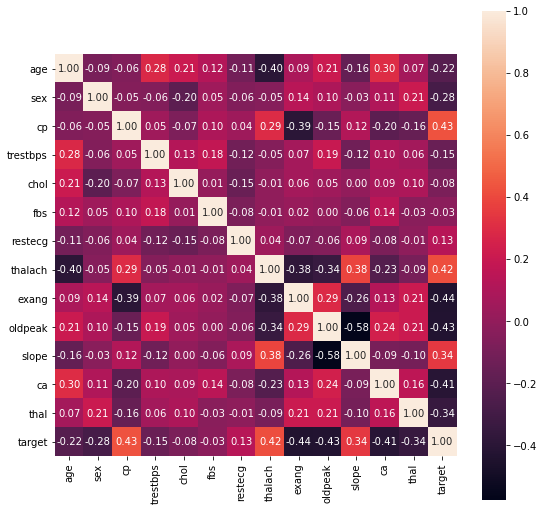

In [11]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(heart.corr(), annot=True, fmt='.2f', square=True)

In [12]:
categorical_val = []
continuous_val = []
for column in heart.columns:
    if len(heart[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

In [13]:
categorical_val.remove('target')
df = pd.get_dummies(heart, columns = categorical_val, drop_first=True)

In [14]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = continuous_val
df[col_to_scale] = s_sc.fit_transform(df[col_to_scale])

In [17]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [18]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# 2. Logistic Regression

In [20]:
model = LogisticRegression(solver='liblinear')

In [21]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [22]:
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

In [23]:
results_df = pd.DataFrame(data=[['Logistic Regression', train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.255924,87.912088


# 3.  K-nearest neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[['K-nearest neighbors', train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.255924,87.912088
1,K-nearest neighbors,81.990521,83.516484


#  4. Decision Tree

In [27]:
tree_clf = tree.DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[['Decision Tree Classifier', train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.255924,87.912088
1,K-nearest neighbors,81.990521,83.516484
2,Decision Tree Classifier,100.000000,78.021978


[Text(472.75, 293.54400000000004, 'X[20] <= 0.5\ngini = 0.496\nsamples = 211\nvalue = [96, 115]'),
 Text(248.0, 228.312, 'X[4] <= -0.425\ngini = 0.38\nsamples = 94\nvalue = [70, 24]'),
 Text(124.0, 163.08000000000004, 'X[15] <= 0.5\ngini = 0.497\nsamples = 26\nvalue = [12, 14]'),
 Text(62.0, 97.84800000000001, 'X[2] <= -0.174\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(31.0, 32.61600000000004, '\n  (...)  \n'),
 Text(93.0, 32.61600000000004, '\n  (...)  \n'),
 Text(186.0, 97.84800000000001, 'X[0] <= -0.213\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(155.0, 32.61600000000004, '\n  (...)  \n'),
 Text(217.0, 32.61600000000004, '\n  (...)  \n'),
 Text(372.0, 163.08000000000004, 'X[3] <= -0.178\ngini = 0.251\nsamples = 68\nvalue = [58, 10]'),
 Text(310.0, 97.84800000000001, 'X[19] <= 0.5\ngini = 0.08\nsamples = 48\nvalue = [46, 2]'),
 Text(279.0, 32.61600000000004, '\n  (...)  \n'),
 Text(341.0, 32.61600000000004, '\n  (...)  \n'),
 Text(434.0, 97.84800000000001, 'X[8] <= 

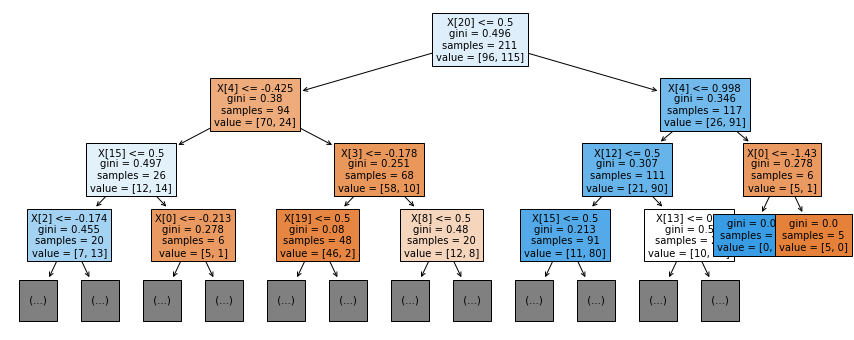

In [29]:
plt.figure(figsize=(15,6))
tree.plot_tree(tree_clf, filled=True, fontsize=10, max_depth = 3)

# 5. Random Forest

In [30]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [31]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[['Random Forest Classifier', train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.255924,87.912088
1,K-nearest neighbors,81.990521,83.516484
2,Decision Tree Classifier,100.000000,78.021978
3,Random Forest Classifier,100.000000,84.615385


# 6. Selection of max_depth parameter

In [32]:
max_depth_values = range(1, 11)
scores_data = pd.DataFrame()

In [33]:
from sklearn.model_selection import cross_val_score
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score= clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score=cross_val_score(clf, X_train, y_train, cv=3).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [34]:
scores_data.sort_values(by='test_score', ascending=False)

,max_depth,train_score,test_score,cross_val_score
0,9,0.990521,0.835165,0.743796
0,4,0.848341,0.813187,0.686989
0,8,0.971564,0.802198,0.710597
0,10,0.995261,0.802198,0.729577
0,7,0.962085,0.780220,0.701207
0,1,0.763033,0.769231,0.729645
0,2,0.772512,0.769231,0.724883
0,5,0.886256,0.769231,0.720121
0,6,0.933649,0.769231,0.719987
0,3,0.815166,0.758242,0.743930


In [35]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                                     value_vars=['train_score', 'test_score', 'cross_val_score'],
                                     var_name='set_type', value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

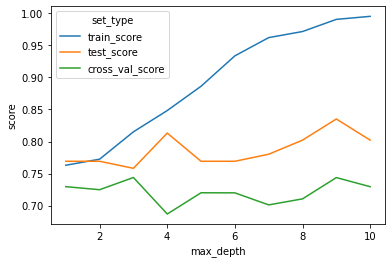

In [36]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

# 7. GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
params = {'criterion':('gini', 'entropy'), 
          'max_depth':(list(range(1, 11))), 
          'min_samples_split':[2, 3, 4], 
          'min_samples_leaf':list(range(1, 11))
          }

In [39]:
tree_clf = tree.DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring='accuracy', n_jobs=-1, cv=3)

In [40]:
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [41]:
tree_cv.best_score_, tree_cv.best_params_

(0.7582830315224681,
 {'criterion': 'gini',
  'max_depth': 3,
  'min_samples_leaf': 2,
  'min_samples_split': 2})

In [42]:
best_clf = tree_cv.best_estimator_

In [43]:
best_clf.score(X_test, y_test)

0.7252747252747253

In [44]:
y_pred = best_clf.predict(X_test)

In [45]:
precision = precision_score(y_test, y_pred)

In [46]:
recall = recall_score(y_test, y_pred)

In [47]:
accuracy = accuracy_score(y_test, y_pred)

In [48]:
metrics = pd.DataFrame({'precision': [precision], 
                                    'recall': [recall],
                                    'accuracy': [accuracy]})
metrics

,precision,recall,accuracy
0,0.76087,0.714286,0.725275
